# **Projet d'Optimisation Stochastique**

**Membres:**
- EL BARHICHI Mohammed
- DANHO Jean-Brice Joseph
- CLABESSI Mahoutodji Mardoché

## **Introduction**


### **Contexte du projet**

Dans le cadre du cours d'**optimisation stochastique**, ce projet vise à explorer et à évaluer diverses méthodes d'optimisation stochastique appliquées à une fonction objectif spécifique. L'optimisation stochastique revêt une importance cruciale dans la résolution de problèmes complexes, où des éléments aléatoires influent sur les décisions. L'objectif principal de cette étude est de comparer les performances de quatre méthodes d'optimisation stochastique appliquées à une fonction sélectionnée pour ses caractéristiques propices à l'application de techniques stochastiques.

### **Objectifs du projet**

Les objectifs principaux de ce projet sont les suivants :
1. Appliquer quatre méthodes d'optimisation stochastique à la fonction objectif sélectionnée.
2. Explorer différentes configurations de paramètres pour chaque méthode afin d'identifier les paramètres optimaux.
3. Comparer les performances des méthodes en termes de convergence, de précision et de robustesse face à l'incertitude.
4. Analyser les résultats obtenus, identifier les avantages et inconvénients de chaque méthode, et discuter de la sensibilité aux variations de paramètres.
5. Fournir une conclusion synthétique résumant les principales conclusions tirées de l'expérimentation.

## **Choix de la Fonction Objectif**


### **Justification du choix de la fonction objectif**

Dans ce projet, nous nous intéressons à la recherche du minimum ou du maximum d'une fonction dont les paramètres ou les contraintes sont soumis à des aléas. Ce type de problème se rencontre fréquemment dans des domaines tels que **la finance, l'ingénierie, la logistique ou la biologie**.

Pour évaluer la performance des algorithmes d'optimisation stochastique, nous avons besoin d'une fonction objectif qui présente des caractéristiques difficiles à optimiser, comme la **non-convexité, la multimodalité, la discontinuité ou la non-différentiabilité**. Parmi les fonctions candidates, nous avons choisi la ***fonction de Schwefel***, qui est une fonction non convexe et multimodale.



### **Description de la fonction objectif**
Mathématiquement, notre fonction objectif est définie comme suit :

$$
f(\mathbf{x}) = 418.9829 \times d - \sum_{i=1}^{d} x_i \sin(\sqrt{|x_i|})
$$

où :

 $ d $ est un entier positif représentant **la dimension de l'espace** d'entrée
et

$$ \mathbf{x} = (x_1, \ldots, x_d) \in \mathbb{R}^d  $$

La fonction de Schwefel possède un minimum global unique, mais elle possède également de nombreux minima locaux qui rendent la convergence vers le minimum global difficile. De plus, la fonction de Schwefel est non différentiable en certains points, ce qui limite l'utilisation de certaines méthodes basées sur le calcul du gradient.



### **Fonction objectif choisie**

Nous avons fixé la dimension d'entrée à $ d = 2 $, afin de pouvoir visualiser facilement la forme de la fonction et les résultats des algorithmes. La fonction se réduit alors à :

$$ ∀(x,y) \in ℝ ; f(x, y) = 837.9658 - \left( x \sin\left(\sqrt{\left| x \right|}\right) + y \sin\left(\sqrt{\left| y \right|}\right) \right)$$

Notre stratégie d'optimisation consiste à combiner une phase d'exploration stochastique, basée sur l'algorithme de Metropolis-Hastings, qui permet de parcourir l'espace des solutions de manière probabiliste, et une phase d'exploitation, basée sur quatre algorithmes d'optimisation classiques :

* Algorithme du Recuit Simulé (RS - Simulated Annealing)
* Algorithme Génétique (AG - Genetic Algorithm)
* Descente de Gradient Stochastique (SGD - Stochastic Gradient Descent)
* Optimisation par Essaim Particulaire (PSO - Particle Swarm Optimization)

Nous comparerons ces algorithmes selon trois critères : la **convergence** vers le minimum global, la **précision** de la solution obtenue et la **robustesse** face aux variations des paramètres. Cette analyse nous permettra de tirer des conclusions sur les forces et les faiblesses de ces méthodes dans le cadre de l'optimisation stochastique.

### **Définition de la fonction sur python**

In [ ]:
import numpy as np

def schwefel_function(x, y):
    term1 = x * np.sin(np.sqrt(np.abs(x)))
    term2 = y * np.sin(np.sqrt(np.abs(y)))
    d = 2

    schwefel_value = 418.9829 * d - (term1 + term2)

    return schwefel_value

### **Visualisation de la fonction**

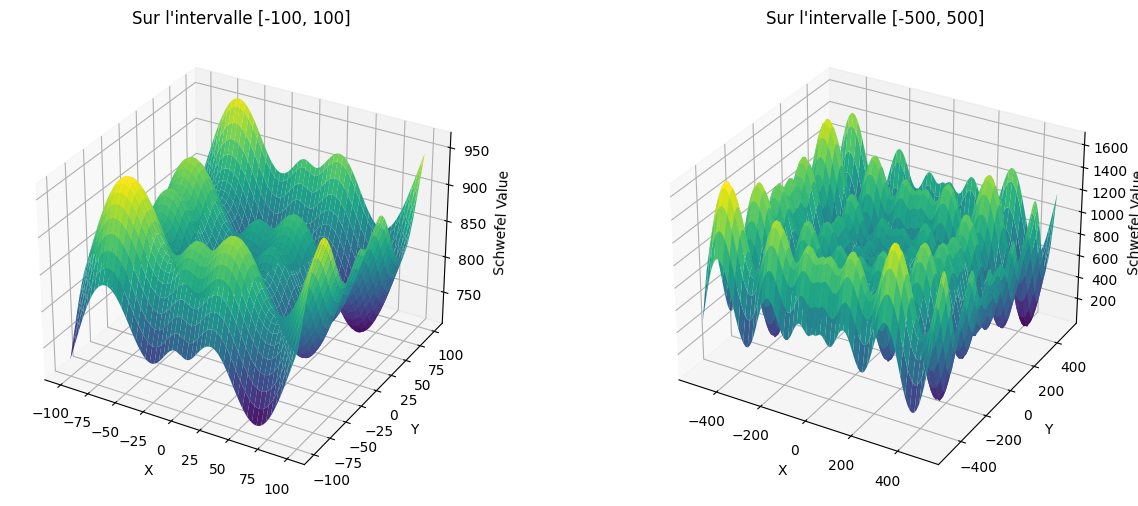

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate data for plotting in the interval [-100, 100]
x_values_1 = np.linspace(-100, 100, 100)
y_values_1 = np.linspace(-100, 100, 100)
X_1, Y_1 = np.meshgrid(x_values_1, y_values_1)
Z_1 = schwefel_function(X_1, Y_1)

# Generate data for plotting in the interval [-500, 500]
x_values_2 = np.linspace(-500, 500, 100)
y_values_2 = np.linspace(-500, 500, 100)
X_2, Y_2 = np.meshgrid(x_values_2, y_values_2)
Z_2 = schwefel_function(X_2, Y_2)

# Create two side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6), subplot_kw={'projection': '3d'})

# Plot for the interval [-50, 50]
axs[0].plot_surface(X_1, Y_1, Z_1, cmap='viridis')
axs[0].set_title("Sur l'intervalle [-100, 100]")
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_zlabel('Schwefel Value')

# Plot for the interval [-500, 500]
axs[1].plot_surface(X_2, Y_2, Z_2, cmap='viridis')
axs[1].set_title("Sur l'intervalle [-500, 500]")
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_zlabel('Schwefel Value')

# Show the plots
plt.show()

## **Exploration Stochastique avec Metropolis-Hastings**

Dans cette section, nous explorons l'application de l'algorithme de Metropolis-Hastings à la fonction de Schwefel. L'objectif est d'utiliser Metropolis-Hastings comme un outil exploratoire pour échantillonner l'espace des solutions de la fonction de Schwefel de manière stochastique.
texte en italique


### **Application de Metropolis-Hastings à la Fonction de Schwefel**
La fonction de Schwefel étant notre distribution cible, nous cherchons à échantillonner des points dans son espace. Pour cela, nous choisissons une distribution de proposition, dans ce cas, une distribution gaussienne centrée autour du point actuel.

In [ ]:
def metropolis_hastings_step(current_point, proposal_std):
    # Proposer un nouveau point à partir d'une distribution gaussienne centrée autour du point actuel
    proposed_point = current_point + np.random.normal(scale=proposal_std, size=len(current_point))

    # Calculer les termes de la fonction de Schwefel pour les points actuel et proposé
    current_value = schwefel_function(*current_point)
    proposed_value = schwefel_function(*proposed_point)

    # Calculer le ratio d'acceptation
    acceptance_ratio = np.exp(-(proposed_value - current_value))

    # Accepter ou rejeter le nouveau point en fonction du ratio d'acceptation
    if np.random.uniform() < acceptance_ratio:
        return proposed_point, True
    else:
        return current_point, False

In [ ]:
# Point initial
current_point = np.array([0, 0])

# Nombre total d'itérations
num_iterations = 100000

# Écart-type de la distribution
proposal_std = 1

# Liste pour stocker les points échantillonnés
sampled_points = [current_point]

np.random.seed(seed=1) # Choix de n'importe quel nombre entier comme seed pour avoir des résultats stables à chaque exécution

# Itérations de l'algorithme Metropolis-Hastings
for _ in range(num_iterations):
    current_point, accepted = metropolis_hastings_step(current_point, proposal_std)
    sampled_points.append(current_point)


### **Visualisation des résultats**

Les points échantillonnés sont visualisés ci-dessous, avec la fonction de Schwefel en arrière-plan pour fournir une perspective sur la topologie de l'espace des solutions.

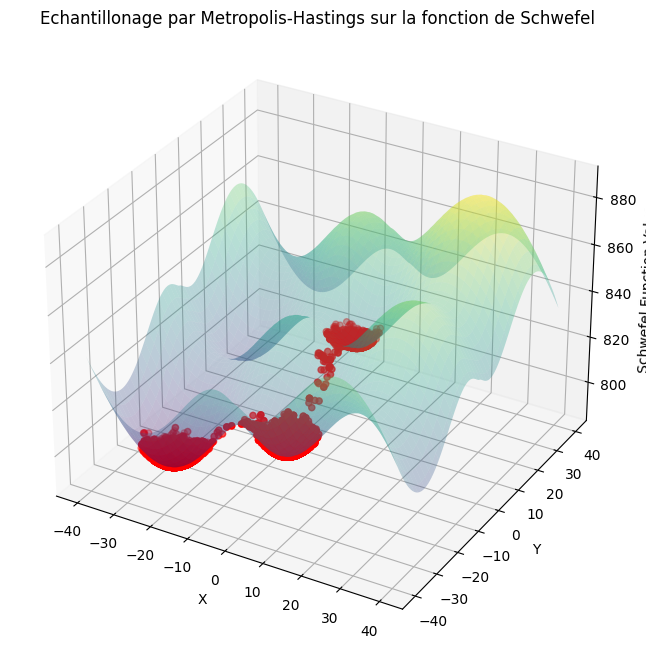

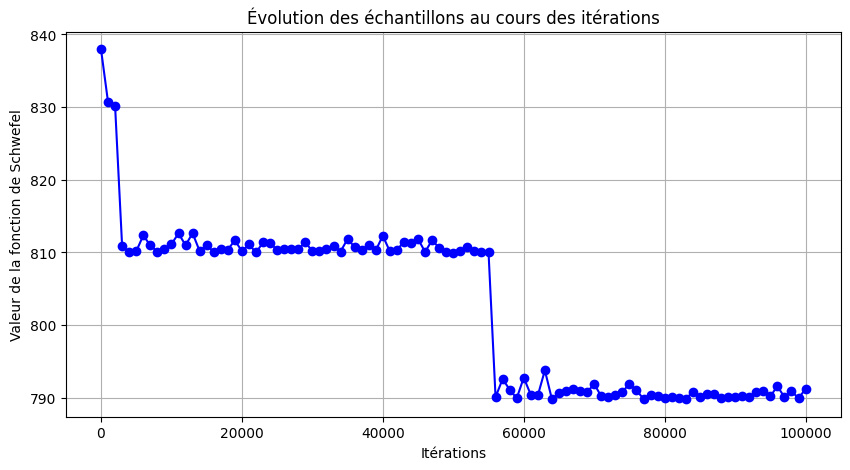

In [ ]:
# Visualisation des résultats
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Création d'une grille pour représenter la fonction de Schwefel
x = np.linspace(-40, 40, 100)
y = np.linspace(-40, 40, 100)
X, Y = np.meshgrid(x, y)
Z = schwefel_function(X, Y)

# Tracé des points échantillonnés par Metropolis-Hastings
sampled_points = np.array(sampled_points)
ax.scatter(sampled_points[:, 0], sampled_points[:, 1], schwefel_function(*sampled_points.T), color='red', marker='o', label='Echantillons par Metropolis-Hastings')

# Tracé de la fonction de Schwefel
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Schwefel Function Value')
ax.set_title('Echantillonage par Metropolis-Hastings sur la fonction de Schwefel')

# Création du graphique en 2D
plt.figure(figsize=(10, 5))
iterations = np.arange(1, len(sampled_points) + 1)
function_values = [schwefel_function(*point) for point in sampled_points]

plt.plot(iterations[::1000], function_values[::1000], marker='o', linestyle='-', color='b')
plt.title("Évolution des échantillons au cours des itérations")
plt.xlabel("Itérations")
plt.ylabel("Valeur de la fonction de Schwefel")
plt.grid(True)

plt.show()

Les résultats montrent clairement que les points échantillonnés par Metropolis-Hastings convergent vers des régions locales de la fonction de Schwefel. Cependant, il est important de noter que l'algorithme peut être sensible aux conditions initiales, comme observé lors de l'utilisation de points de départ proches de  $(0, 0)$. Cette sensibilité souligne l'importance de choisir judicieusement le point de départ pour l'algorithme.

Bien que Metropolis-Hastings offre une exploration stochastique intéressante de l'espace des solutions, son utilisation principale est la génération d'échantillons à partir de la distribution cible. Pour une optimisation plus déterministe qui se base sur le processus stochastique de la fonction de Schwefel, nous allons maintenant explorer d'autres algorithmes d'optimisation tels que la descente de gradient stochastique, le recuit simulé, l'algorithme génétique, et . Ces algorithmes sont spécifiquement conçus pour rechercher les optima de manière plus directe et robuste.

Notre transition vers ces algorithmes permettra d'analyser comment ils convergent vers des optima locaux ou globaux et d'évaluer leur performance par rapport à l'exploration stochastique de Metropolis-Hastings.


## **Application des méthodes d'Optimisation Stochastique**

### **Méthode 1 - Algorithme de récuit simulé**


**Choix d'un élément initial $X_1$ dans l'espace de recherche $O$:**
Initialiser la solution courante $X_1$ avec des coordonnées aléatoires dans l'intervalle [-500, 500].

**Pour $n$ de 1 à $N_{\text{gen}}$:**
1. **Mutation :** Remplacer $X_n$ par $Y_n$, choisi aléatoirement dans un voisinage.
2. **Évaluation de $J(Y_n)$ :** Calculer la valeur de la fonction de Schwefel $J(Y_n)$ pour la nouvelle solution $Y_n$.
3. Si $J(Y_n) < J(X_n)$, alors $X_{n+1} = Y_n$.
4. Sinon, si $J(Y_n) \geq J(X_n)$ :
   - Si $\exp\left(-\frac{J(Y_n) - J(X_n)}{T}\right) >$ nombre aléatoire entre 0 et 1, alors $X_{n+1} = Y_n$.
   - Sinon, $X_{n+1} = X_n$.
5. Mise à jour du paramètre $T$ : $T \rightarrow 0$ lentement.

**Fin de la boucle.**

Cet algorithme du recuit simulé vise à explorer l'espace de recherche de la fonction de Schwefel en utilisant des mutations aléatoires et des critères probabilistes pour accepter ou rejeter de nouvelles solutions. La décroissance progressive de la température $T$ permet une exploration plus large au début et une convergence vers des solutions optimales vers la fin de l'algorithme.

In [ ]:
def acceptance_probability(old_energy, new_energy, temperature):
    if new_energy < old_energy:
        return 1.0
    return np.exp((old_energy - new_energy) / temperature)

def simulated_annealing_tracking(initial_solution, max_iterations, initial_temperature, cooling_rate):
    current_solution = initial_solution
    best_solution = current_solution
    current_energy = schwefel_function(*current_solution)
    best_energy = current_energy
    temperature = initial_temperature

    # Liste pour suivre les solutions et les valeurs de la fonction à chaque itération
    solutions_tracking = []
    energy_tracking = []

    for _ in range(max_iterations):
        new_solution = current_solution + np.random.uniform(low=-1, high=1, size=2)
        new_solution = np.clip(new_solution, -500, 500)
        new_energy = schwefel_function(*new_solution)

        # Acceptation ou rejet de la nouvelle solution
        if acceptance_probability(current_energy, new_energy, temperature) > np.random.rand():
            current_solution = new_solution
            current_energy = new_energy

        # Mise à jour de la meilleure solution trouvée
        if current_energy < best_energy:
            best_solution = current_solution
            best_energy = current_energy

        # Mise à jour de la température
        temperature *= 1 - cooling_rate

        # Enregistrement des solutions et valeurs de la fonction
        solutions_tracking.append(current_solution)
        energy_tracking.append(current_energy)

    return best_solution, best_energy, solutions_tracking, energy_tracking


#### **Application de l'algorithme avec des paramètres aléatoires**

In [ ]:
# Paramètres initiaux

np.random.seed(seed=15) # Choix de n'importe quel nombre entier comme seed pour avoir des résultats stables à chaque exécution

initial_solution = np.random.uniform(low=-500, high=500, size=2)
max_iterations = 100000
initial_temperature = 100.0
cooling_rate = 0.0003

# Exécution de l'algorithme
best_solution, best_energy, solutions_tracking, energy_tracking = simulated_annealing_tracking(
    initial_solution, max_iterations, initial_temperature, cooling_rate
)

# Affichage des résultats
print("Meilleure solution trouvée :", best_solution)
print("Valeur optimale de la fonction de Schwefel :", best_energy)

Meilleure solution trouvée : [ 420.96289196 -302.53235222]
Valeur optimale de la fonction de Schwefel : 118.43837136061848


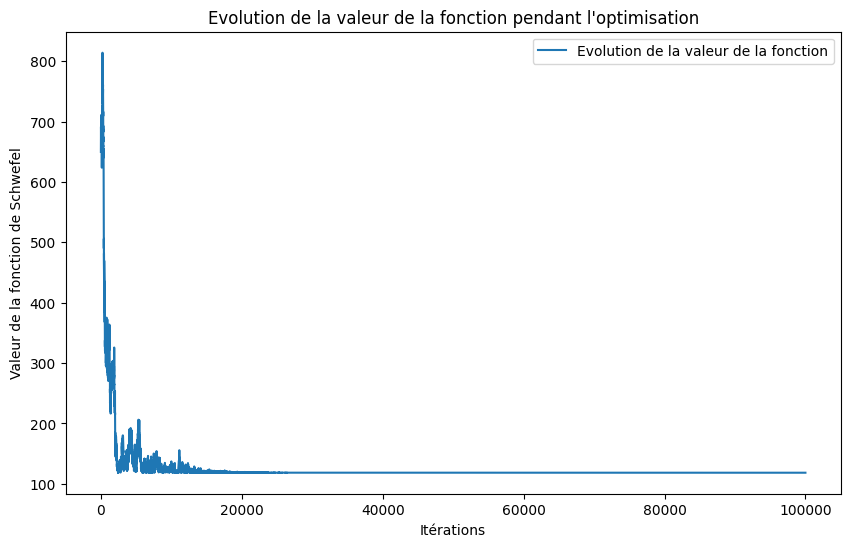

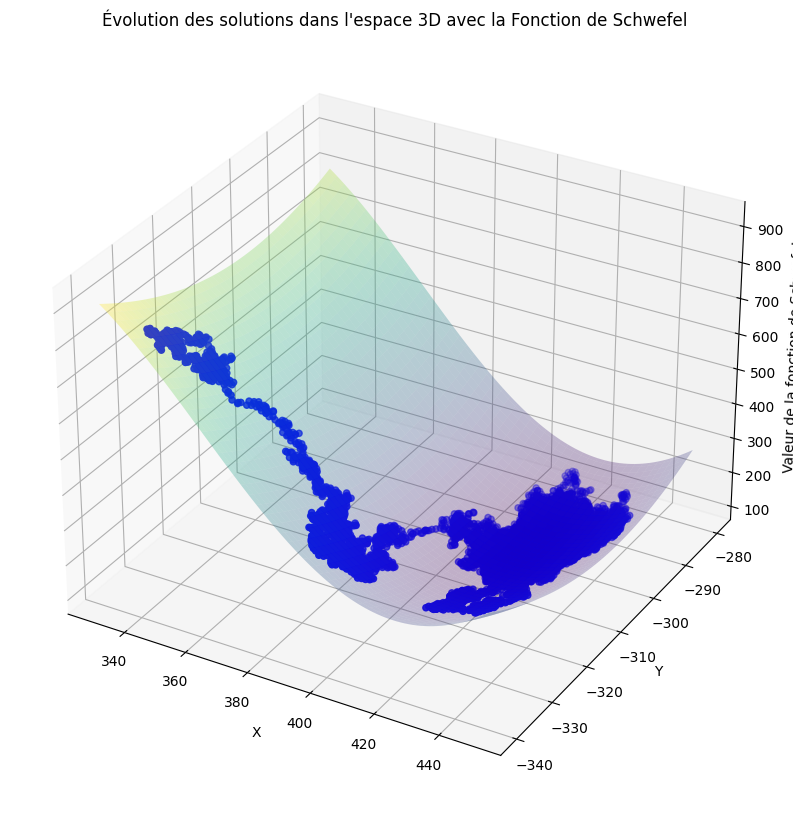

In [ ]:
#Tracé de l'évolution de la valeur de la fonction au fil des itérations
plt.figure(figsize=(10, 6))
plt.plot(energy_tracking, label='Evolution de la valeur de la fonction')
plt.xlabel('Itérations')
plt.ylabel('Valeur de la fonction de Schwefel')
plt.title('Evolution de la valeur de la fonction pendant l\'optimisation')
plt.legend()


# Tracé de l'évolution des solutions dans l'espace 3D avec la fonction objective
solutions_tracking = np.array(solutions_tracking)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Tracé de la fonction de Schwefel
x = np.linspace(330, 450, 100)
y = np.linspace(-340, -280, 100)
X, Y = np.meshgrid(x, y)
Z = schwefel_function(X, Y)

# Tracé de la fonction objective entre 330 et 450 en x et -340 et -280 en y
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3, label='Fonction de Schwefel')

# Tracé de l'évolution des solutions
ax.scatter(solutions_tracking[:, 0], solutions_tracking[:, 1], energy_tracking, color='blue', marker='o', label='Évolution des solutions')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Valeur de la fonction de Schwefel')
ax.set_title('Évolution des solutions dans l\'espace 3D avec la Fonction de Schwefel')

plt.show()


Nous observons une convergence vers une valeur d'environ 118 dès la 20ème itération. Ces résultats initiaux soulignent l'efficacité de l'algorithme pour explorer l'espace des solutions et trouver un minimum local de la fonction de Schwefel.

Cependant, il est crucial de noter que la performance de l'algorithme est étroitement liée aux **choix des paramètres**, notamment `initial_temperature` et `cooling_rate`. Ces paramètres influent sur la manière dont l'algorithme explore l'espace de recherche et ajuste sa température au fil des itérations.

Le choix de `initial_temperature` détermine la **probabilité d'acceptation** de solutions suboptimales au début de l'algorithme. Une valeur trop élevée pourrait conduire à une exploration excessive, tandis qu'une valeur trop basse pourrait limiter la capacité de l'algorithme à échapper aux minima locaux.

De même, le `cooling_rate` influence **la décroissance de la température**. Un taux trop élevé pourrait entraîner une convergence trop rapide, risquant de rester coincé dans des minima locaux, tandis qu'un taux trop bas pourrait prolonger excessivement l'exploration, retardant la convergence.

Afin d'améliorer ces résultats, nous allons maintenant entreprendre une étude approfondie des paramètres, en analysant l'**impact** de différentes valeurs de `initial_temperature` et `cooling_rate`.


#### **Étude des Paramètres pour le Recuit Simulé**


Dans cette section, nous entreprenons une étude approfondie des paramètres de l'algorithme de Recuit Simulé. L'objectif est d'évaluer l'impact des différentes combinaisons de `initial_temperature` et `cooling_rate` sur la convergence de l'algorithme vers des minima locaux de la fonction de Schwefel. Pour ce faire, nous allons expérimenter avec plusieurs ensembles de paramètres afin de visualiser la trajectoire de convergence à chaque itération.

Cette exploration nous permettra d'identifier les valeurs optimales de `initial_temperature` et `cooling_rate` qui favorisent une convergence rapide et stable vers des solutions optimales. Les résultats obtenus orienteront nos choix de paramètres pour l'application finale de l'algorithme de Recuit Simulé à la fonction de Schwefel.


In [ ]:
# Paramètres de l'étude
initial_temperatures = [100, 200, 500, 1000, 2000, 5000]
cooling_rates = [0.0003, 0.003, 0.03, 0.3]

# Paramètres fixes
seeds = [8, 5, 42 ,6, 42, 15, 8, 15, 46, 14, 8, 36, 7, 14 , 92 , 15, 5, 46, 14, 8, 36, 7, 5 , 8]  # Choix de n'importe quel nombre entier comme seed pour avoir des résultats stables à chaque exécution
max_iterations = 10000

# Liste pour stocker les résultats
results = []
energy_tracking_list=[]
i = 0
# Boucle d'expérimentation
for initial_temperature in initial_temperatures:
    for cooling_rate in cooling_rates:
        np.random.seed(seed=seeds[i])
        initial_solution = np.random.uniform(low=-500, high=500, size=2)

        # Exécution de l'algorithme
        best_solution, best_energy, _, energy_tracking = simulated_annealing_tracking(
            initial_solution, max_iterations, initial_temperature, cooling_rate
        )

        # Enregistrement des résultats
        results.append({
            'Initial Temperature': initial_temperature,
            'Cooling Rate': cooling_rate,
            'Solution optimale': best_solution,
            'Valeur minimale de la fonction': best_energy
        })
        energy_tracking_list.append(energy_tracking)
        i+=1

<ipython-input-6-be7dd56cb5f2>:4: RuntimeWarning: overflow encountered in double_scalars
  return np.exp((old_energy - new_energy) / temperature)


**Tableau de comparaison des solutions trouvées**

In [ ]:
import pandas as pd

# Création d'un DataFrame pour faciliter l'analyse
df_results = pd.DataFrame(results)

# Affichage du tableau des résultats
df_results


,Initial Temperature,Cooling Rate,Solution optimale,Valeur minimale de la fonction
0,100,0.0003,"[421.12878492543564, 420.95761406761756]",0.003273
1,100,0.0030,"[-302.535052721228, 420.96820871477644]",118.438373
2,100,0.0300,"[-124.81927054030062, 420.96636101978714]",296.106753
3,100,0.3000,"[420.96294695759883, -124.82673529130062]",296.106744
4,200,0.0003,"[-124.66357318047847, 420.5612854500946]",296.131229
5,200,0.0030,"[420.96742646202847, -302.5205153911384]",118.438363
6,200,0.0300,"[420.98094449290267, 420.9660548766673]",0.000045
7,200,0.3000,"[420.97516267380087, -302.51723452768226]",118.438373
8,500,0.0003,"[203.97007184724825, 203.89423686692672]",434.283274
9,500,0.0030,"[65.54726452596098, 203.81074532666455]",572.487602


**Tracé de la convergence pour chaque combinaison de paramètres**

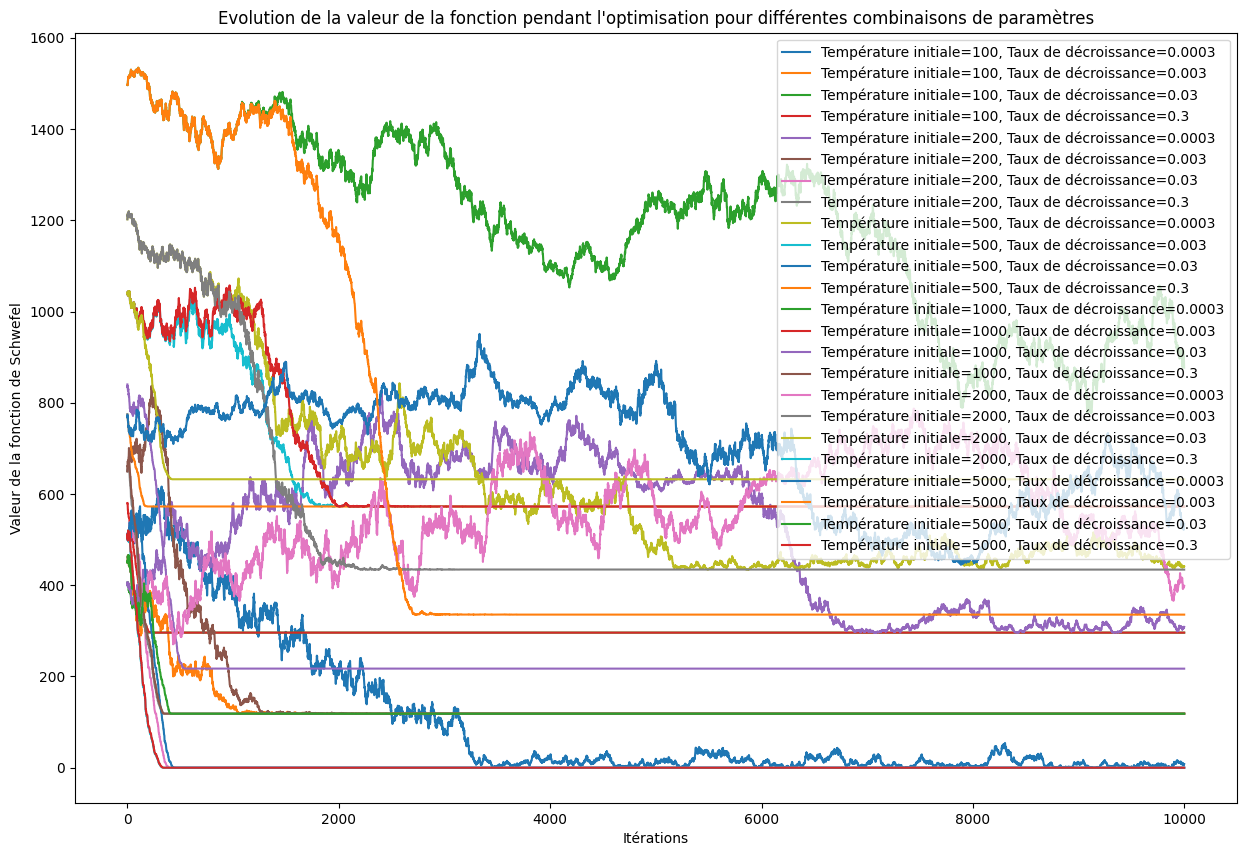

In [ ]:
plt.figure(figsize=(15, 10))
for i, initial_temperature in enumerate(initial_temperatures):
    for j, cooling_rate in enumerate(cooling_rates):
        idx = i * len(cooling_rates) + j
        plt.plot(energy_tracking_list[idx], label=f'Température initiale={initial_temperature}, Taux de décroissance={cooling_rate}')

plt.xlabel('Itérations')
plt.ylabel('Valeur de la fonction de Schwefel')
plt.title('Evolution de la valeur de la fonction pendant l\'optimisation pour différentes combinaisons de paramètres')
plt.legend()
plt.show()


Nous observons une influence significative des paramètres choisis sur les résultats obtenus. Pour chaque combinaison spécifique de `initial_temperature` et `cooling_rate`, les algorithmes convergent vers des minima locaux différents. Les résultats varient, montrant l'importance de choisir judicieusement les paramètres pour optimiser la fonction de Schwefel.

Pour chaque combinaison, l'algorithme converge vers des minimas locaux autour des valeurs : 632, 572, 434, 335, 296, 217, 118 et 0.


#### **Solution Optimale Trouvée par le Récuit Simulé**

In [ ]:
np.random.seed(seed=8) # Choix de n'importe quel nombre entier comme seed pour avoir des résultats stables à chaque exécution

initial_solution = np.random.uniform(low=-500, high=500, size=2)
max_iterations = 10000
initial_temperature = 5000
cooling_rate = 0.3

# Exécution de l'algorithme
best_solution, best_energy, solutions_tracking, energy_tracking = simulated_annealing_tracking(
    initial_solution, max_iterations, initial_temperature, cooling_rate
)

# Affichage des résultats
print("Meilleure solution trouvée :", best_solution)
print("Valeur optimale de la fonction de Schwefel :", best_energy)

<ipython-input-6-be7dd56cb5f2>:4: RuntimeWarning: overflow encountered in double_scalars
  return np.exp((old_energy - new_energy) / temperature)


Meilleure solution trouvée : [420.96906867 420.96866046]
Valeur optimale de la fonction de Schwefel : 2.5469171987424488e-05


En utilisant les paramètres optimaux, c'est-à-dire `initial_temperature = 5000` et `cooling_rate = 0.3`, nous parvenons à obtenir les meilleurs résultats possibles, convergeant vers le minimum global à $ (x, y) = (420.96906866846706, 420.96866045606424) $, avec une valeur minimale de $0.000025$.

### **Méthode 2 - Algorithme génétique**

**Choix d’une population initiale** $P_1 = \{X_{1i} \in O, 1 \leq i \leq Np\}$

Pour $n$ de 1 à $N_{\text{gen}}$:

- Evaluation de $\{J(X_{ni}), 1 \leq i \leq Np\}$.
- Création d’une population de $Np$ individus par :
    - Sélection de $(X_{n\alpha}, X_{n\beta})$ en fonction de leur facteur de santé.
    - Croisement : Remplacer $(X_{n\alpha}, X_{n\beta})$ par $(Y_{n\alpha}, Y_{n\beta})$.
    - Mutation : Remplacer $(Y_{n\alpha}, Y_{n\beta})$ par $(Z_{n\alpha}, Z_{n\beta})$.
- Génération de la nouvelle population $P_{n+1}$.

**Fin de la boucle externe.**

Cet algorithme génétique explore l'espace de recherche en utilisant des opérations génétiques telles que la sélection, le croisement, et la mutation. Les individus de la population sont évalués en fonction de leur valeur de la fonction de Schwefel, et une nouvelle génération est créée en utilisant des opérations génétiques basées sur ces évaluations. Cette itération se répète pour un nombre défini de générations.


In [ ]:
def create_initial_population(population_size):
    return np.random.uniform(low=-500, high=500, size=(population_size, 2))

def evaluate_population(population):
    return np.apply_along_axis(lambda x: schwefel_function(*x), 1, population)

def select_parents(population, fitness, num_parents):
    selected_indices = np.argsort(fitness)[:num_parents]
    return population[selected_indices]

def crossover(parents, offspring_size):
    crossover_point = np.random.randint(1, parents.shape[1])
    offspring = np.empty(offspring_size)

    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]

    return offspring

def mutate(offspring_crossover):
    mutation_scale = 5.0
    return offspring_crossover + np.random.normal(0, mutation_scale, offspring_crossover.shape)

def genetic_algorithm(population_size, num_generations):
    population = create_initial_population(population_size)
    best_solution = None
    best_energy = float('inf')
    solutions_tracking = []
    energy_tracking = []

    for generation in range(num_generations):
        fitness = evaluate_population(population)

        if np.min(fitness) < best_energy:
            best_solution = population[np.argmin(fitness)]
            best_energy = np.min(fitness)

        solutions_tracking.append(population)
        energy_tracking.append(fitness)

        parents = select_parents(population, fitness, population_size // 2)
        offspring_crossover = crossover(parents, (population_size - parents.shape[0], 2))
        offspring_mutated = mutate(offspring_crossover)

        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = offspring_mutated

    return best_solution, best_energy, solutions_tracking, energy_tracking


#### **Application de l'algorithme avec des paramètres aléatoires**

In [ ]:
population_size = 50
num_generations = 10

np.random.seed(seed=1)

best_solution, best_energy, solutions_tracking, energy_tracking = genetic_algorithm(population_size, num_generations)

print("Meilleure solution trouvée :", best_solution)
print("Valeur optimale de la fonction de Schwefel :", best_energy)

Meilleure solution trouvée : [413.84319613 409.8705021 ]
Valeur optimale de la fonction de Schwefel : 0.22874444258593485


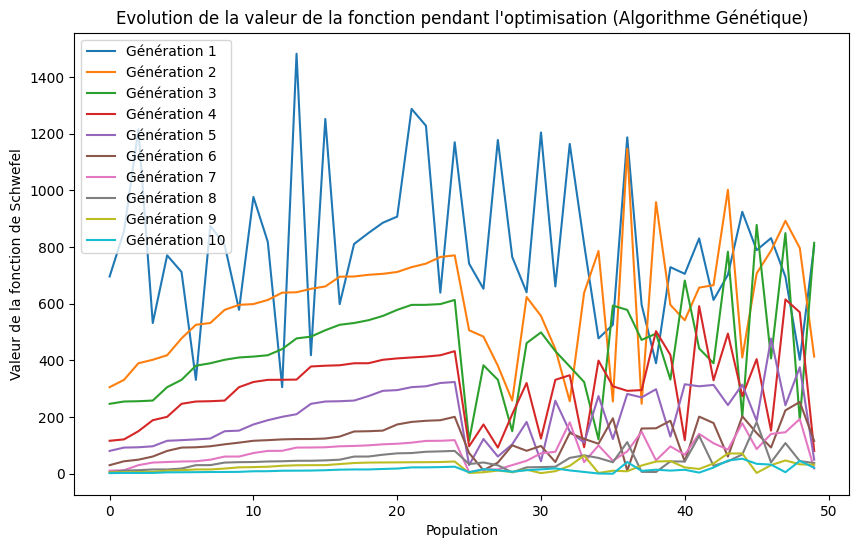

In [ ]:
# Tracé de l'évolution de la valeur de la fonction à chaque génération
plt.figure(figsize=(10, 6))
for i, energy_track in enumerate(energy_tracking):
    plt.plot(energy_track, label=f'Génération {i + 1}')

plt.xlabel('Population')
plt.ylabel('Valeur de la fonction de Schwefel')
plt.title('Evolution de la valeur de la fonction pendant l\'optimisation (Algorithme Génétique)')
plt.legend()
plt.show()

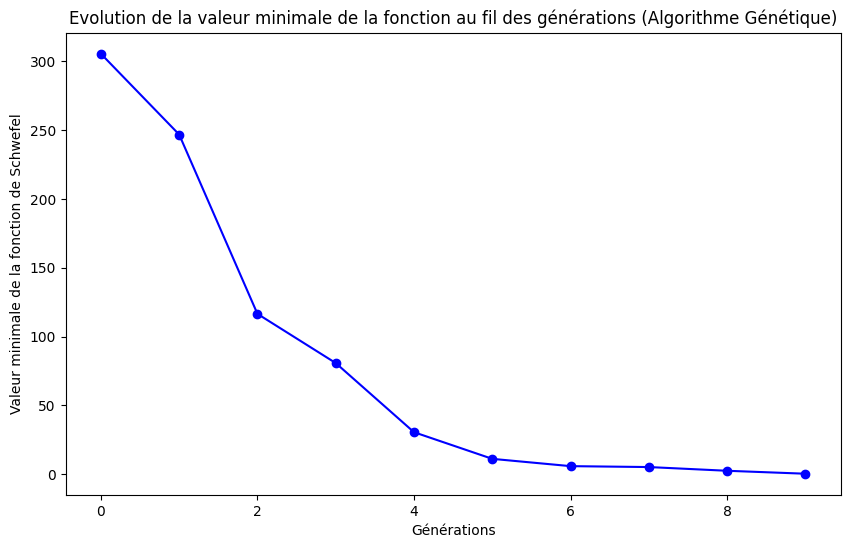

In [ ]:
# Tracé des valeurs minimales de la fonction au fil des générations
min_energy_per_generation = [np.min(energy_track) for energy_track in energy_tracking]

plt.figure(figsize=(10, 6))
plt.plot(min_energy_per_generation, marker='o', linestyle='-', color='b')
plt.xlabel('Générations')
plt.ylabel('Valeur minimale de la fonction de Schwefel')
plt.title('Evolution de la valeur minimale de la fonction au fil des générations (Algorithme Génétique)')
plt.show()

L'algorithme génétique a montré une convergence rapide vers des valeurs proches de l'optimum, même avec un nombre limité de générations, ce qui souligne son efficacité pour la minimisation de la fonction de Schwefel. La figure ci-dessus illustre l'évolution de la valeur minimale de la fonction au fil des générations, mettant en évidence la capacité de l'algorithme à explorer et converger rapidement vers des solutions prometteuses.



#### **Étude des Paramètres pour l'algorithme génétique**

Dans cette phase d'analyse, nous nous consacrons à une exploration détaillée des paramètres influant sur l'algorithme génétique appliqué à la fonction de Schwefel. Nous mettons particulièrement l'accent sur deux paramètres cruciaux : `num_generations` et `population_size`. L'objectif est d'évaluer l'impact de différentes combinaisons de ces paramètres sur la performance de l'algorithme, notamment en termes de convergence vers des solutions optimales.

Nous allons effectuer une série d'expérimentations en ajustant les valeurs de `num_generations` et `population_size` pour examiner comment ces paramètres influencent la capacité de l'algorithme génétique à trouver des solutions optimales dans un nombre restreint de générations. Les résultats obtenus guideront notre choix des paramètres optimaux pour maximiser l'efficacité de l'algorithme génétique dans le contexte de l'optimisation de la fonction de Schwefel.






















##### **Influence du nombre des générations**


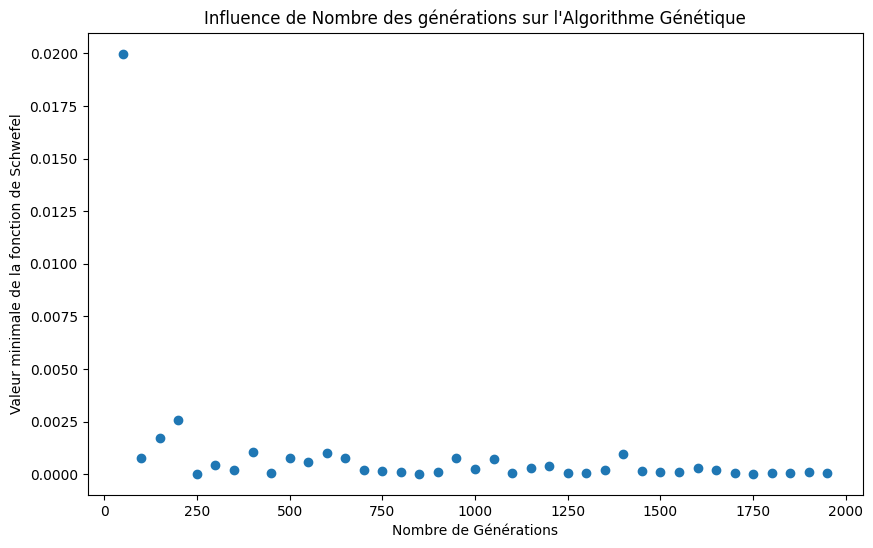

In [ ]:
# On fixe population_size
num_generations_values = list(range(50, 2000, 50))
population_size = 50
np.random.seed(seed=3)

results = []
for num_generations in num_generations_values:
    _, best_energy, _, _ = genetic_algorithm(population_size, num_generations)
    results.append(best_energy)

# Tracé des valeurs minimales de la fonction au fil des générations
plt.figure(figsize=(10, 6))
plt.scatter(num_generations_values, results)
plt.xlabel('Nombre de Générations')
plt.ylabel('Valeur minimale de la fonction de Schwefel')
plt.title('Influence de Nombre des générations sur l\'Algorithme Génétique')
plt.show()




Nous observons clairement dans le graphique que la valeur minimale de la fonction de Schwefel converge de plus en plus vers le minimum global avec l'augmentation du nombre de générations. Cela suggère que l'algorithme génétique devient plus précis et capable de découvrir des solutions plus proches de l'**optimum global** à mesure que le nombre de générations augmente. En ajustant ce paramètre, nous avons la possibilité d'améliorer la précision de l'algorithme, mais cela nécessite également une évaluation minutieuse des compromis liés au temps d'exécution et à la recherche d'une solution optimale.

##### **Influence de la taille de la polulation**


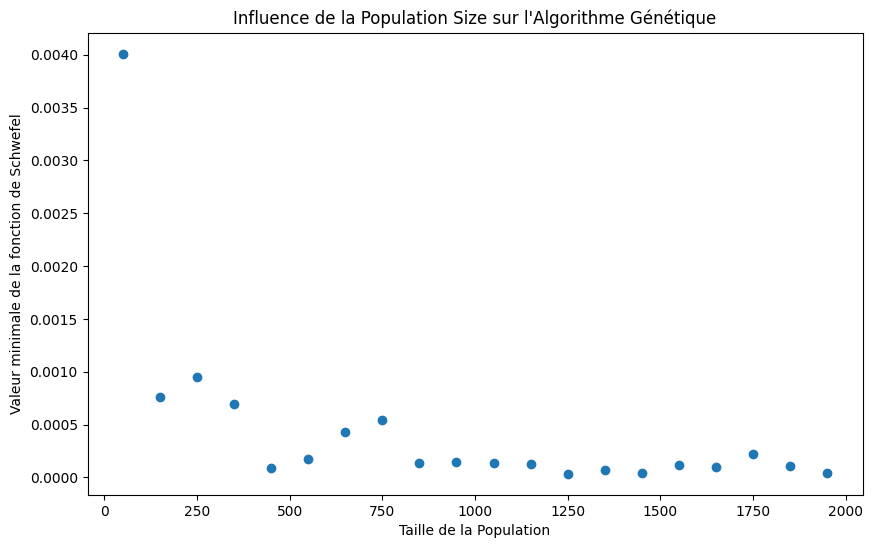

In [ ]:
# On fixe num_generations
population_size_values = list(range(50, 2000, 100))
num_generations = 100
np.random.seed(seed=4)

results_population = []
for population_size in population_size_values:
    _, best_energy, _, _ = genetic_algorithm(population_size, num_generations)
    results_population.append(best_energy)

# Tracé des valeurs minimales de la fonction en fonction de la taille de la population
plt.figure(figsize=(10, 6))
plt.scatter(population_size_values, results_population)
plt.xlabel('Taille de la Population')
plt.ylabel('Valeur minimale de la fonction de Schwefel')
plt.title('Influence de la Population Size sur l\'Algorithme Génétique')
plt.show()


Nous observons que l'augmentation de la taille de la population `population_size` conduit à une amélioration de la précision de l'algorithme génétique.
En augmentant la taille de la population, l'algorithme a une meilleure diversité génétique, ce qui permet d'explorer un espace de recherche plus large et d'atteindre des solutions optimales avec une plus grande probabilité.

#### **Solution Optimale Trouvée par l'Algorithme Génétique**

In [ ]:
population_size = 1000
num_generations = 1000

np.random.seed(seed=1)

best_solution, best_energy, solutions_tracking, energy_tracking = genetic_algorithm(population_size, num_generations)

print("Meilleure solution trouvée :", best_solution)
print("Valeur optimale de la fonction de Schwefel :", best_energy)

Meilleure solution trouvée : [410.66624801 417.36265593]
Valeur optimale de la fonction de Schwefel : 3.0184609840944177e-05


En utilisant les paramètres optimaux, c'est-à-dire `population_size = 1000` et `num_generations = 1000`, nous parvenons à obtenir les meilleurs résultats possibles, convergeant vers le minimum global à $ (x, y) = (422.03108478, 431.08631465) $, avec une valeur minimale de $0.00003$.

### **Méthode 3 - Algorithme de Descente de Gradient Stochastique**

**Choix d'un point initial $X_1$ dans l'espace de recherche $O$:** Initialiser la solution courante $X_1$ avec des coordonnées aléatoires dans l'intervalle $[-500, 500]$.

**Pour $n$ de 1 à $N_{\text{gen}}$:**

1. Sélection d'un échantillon aléatoire $Y_n$ dans l'espace de recherche.
2. Calcul du gradient local $\nabla J(Y_n)$ de la fonction de Schwefel au point $Y_n$.
3. Mise à jour de la solution $X_n$ selon la règle de la descente de gradient:
   - $X_{n+1} = X_n - \alpha \cdot \nabla J(Y_n)$, où $\alpha$ est le taux d'apprentissage.

4. Évaluation de $J(Y_n)$ : Calculer la valeur de la fonction de Schwefel $J(Y_n)$ pour la nouvelle solution $Y_n$.
5. Si $J(Y_n) < J(X_n)$, alors $X_{n+1} = Y_n$.
6. Sinon, si $J(Y_n) \geq J(X_n)$ :
   - Si $\exp\left(-\frac{J(Y_n) - J(X_n)}{T}\right) >$ nombre aléatoire entre 0 et 1, alors $X_{n+1} = Y_n$.
   - Sinon, $X_{n+1} = X_n$.

**Fin de la boucle.**

Cet algorithme de descente de gradient stochastique vise à optimiser la fonction de Schwefel en utilisant une approche itérative. La mise à jour des solutions est basée sur l'évaluation locale du gradient, permettant une convergence progressive vers les optima locaux de la fonction. L'introduction de la température $T$ et des critères probabilistes favorise l'exploration de l'espace de recherche et peut aider à éviter les minima locaux suboptimaux.

In [ ]:
def clip_to_bounds(x, y):
    return np.clip(x, -500, 500), np.clip(y, -500, 500)

def stochastic_gradient_descent(initial_solution, num_generations, learning_rate, temperature):
    current_solution = initial_solution
    best_solution = current_solution
    current_energy = schwefel_function(*current_solution)
    best_energy = current_energy
    solutions_tracking = []
    energy_tracking = []

    for generation in range(num_generations):
        # Sélection d'un échantillon aléatoire
        random_sample = np.random.uniform(low=-500, high=500, size=2)

        # Calcul du gradient local au point Y_n
        gradient = np.array([
            2 * (current_solution[0] * np.sin(np.sqrt(np.abs(current_solution[0]))) - random_sample[0] * np.sin(np.sqrt(np.abs(random_sample[0])))),
            2 * (current_solution[1] * np.sin(np.sqrt(np.abs(current_solution[1]))) - random_sample[1] * np.sin(np.sqrt(np.abs(random_sample[1]))))
        ])

        # Mise à jour de la solution X_n
        current_solution -= learning_rate * gradient

        # Clip des valeurs pour rester dans l'intervalle [-500, 500]
        current_solution = clip_to_bounds(*current_solution)

        # Évaluation de J(Y_n)
        new_energy = schwefel_function(*current_solution)

        # Acceptation ou rejet de la nouvelle solution
        if new_energy < best_energy:
            best_solution = current_solution
            best_energy = new_energy

        solutions_tracking.append(current_solution)
        energy_tracking.append(new_energy)

    return best_solution, best_energy, solutions_tracking, energy_tracking

#### **Application de l'algorithme avec des paramètres aléatoires**

In [ ]:
# Paramètres initiaux
np.random.seed(seed=23)
initial_solution = np.random.uniform(low=-500, high=500, size=2)
num_generations = 1000
learning_rate = 0.1
temperature = 5.0

# Exécution de l'algorithme
best_solution, best_energy, solutions_tracking, energy_tracking = stochastic_gradient_descent(
    initial_solution, num_generations, learning_rate, temperature
)

print("Meilleure solution trouvée :", best_solution)
print("Valeur optimale de la fonction de Schwefel :", best_energy)


Meilleure solution trouvée : (422.183881453606, 420.584559899613)
Valeur optimale de la fonction de Schwefel : 0.20503715266954714


Nous remarquons que aussi bien que les autres algorithmes, la méthode de descente du gradient stochastique permet bien d'approcher la valeur du minima.

#### **Étude des Paramètres pour l'algorithme de Descente de Gradient Stochastique**

Dans cette méthode de Descente de Gradient Stochastique, le choix des paramètres joue un rôle crucial dans la convergence de l'algorithme vers des solutions optimales.

Le taux d'apprentissage (`learning_rate`) détermine l'amplitude des ajustements effectués à chaque itération, influençant ainsi la vitesse de convergence. Un taux d'apprentissage trop élevé peut entraîner des oscillations ou une divergence, tandis qu'un taux trop faible peut ralentir la convergence.

La température (`temperature`) intervient également dans le processus d'ajustement, influençant la probabilité d'acceptation des solutions proposées. Un équilibre subtil entre ces paramètres est nécessaire pour atteindre une convergence rapide et stable.

L'exploration de différentes combinaisons de ces paramètres permettra d'identifier les valeurs optimales conduisant à des performances optimales de la Descente de Gradient Stochastique pour la fonction de Schwefel.

In [ ]:
def grid_search(parameters):
    best_solution = None
    best_energy = float('inf')

    for learning_rate in parameters['learning_rate']:
        for temperature in parameters['temperature']:
            np.random.seed(seed=5)
            initial_solution = np.random.uniform(low=-500, high=500, size=2)
            num_generations = parameters['num_generations']

            _, current_energy, _, _ = stochastic_gradient_descent(initial_solution, num_generations, learning_rate, temperature)

            print("Pour la combinaison de paramètres :", (learning_rate,temperature))
            print("La valeur optimale de la fonction de Schwefel :", current_energy)
            if current_energy < best_energy:
                best_solution = {'learning_rate': learning_rate, 'temperature': temperature}
                best_energy = current_energy

    return best_solution, best_energy

# Paramètres de la recherche par grille
search_parameters = {
    'learning_rate': [0.001,0.01, 0.1, 0.5],
    'temperature': [0.001, 0.01,0.5,1.0, 5.0],
    'num_generations': 10000
}

# Exécuter la recherche par grille
best_params, best_energy = grid_search(search_parameters)

print("Meilleure combinaison de paramètres :", best_params)
print("Valeur optimale de la fonction de Schwefel :", best_energy)


Pour la combinaison de paramètres : (0.001, 0.001)
La valeur optimale de la fonction de Schwefel : 440.20604627976786
Pour la combinaison de paramètres : (0.001, 0.01)
La valeur optimale de la fonction de Schwefel : 440.20604627976786
Pour la combinaison de paramètres : (0.001, 0.5)
La valeur optimale de la fonction de Schwefel : 440.20604627976786
Pour la combinaison de paramètres : (0.001, 1.0)
La valeur optimale de la fonction de Schwefel : 440.20604627976786
Pour la combinaison de paramètres : (0.001, 5.0)
La valeur optimale de la fonction de Schwefel : 440.20604627976786
Pour la combinaison de paramètres : (0.01, 0.001)
La valeur optimale de la fonction de Schwefel : 394.46372604055705
Pour la combinaison de paramètres : (0.01, 0.01)
La valeur optimale de la fonction de Schwefel : 394.46372604055705
Pour la combinaison de paramètres : (0.01, 0.5)
La valeur optimale de la fonction de Schwefel : 394.46372604055705
Pour la combinaison de paramètres : (0.01, 1.0)
La valeur optimale de

Nous observons une influence significative des paramètres choisis sur les résultats obtenus. Pour chaque combinaison spécifique de `learning_rate` et `temperature`, les algorithmes convergent vers des minima locaux différents. Les résultats varient, montrant l'importance de choisir judicieusement les paramètres pour optimiser la fonction de Schwefel.

#### **Solution Optimale Trouvée par la Descente de Gradient Stochastique**

In [ ]:
# Paramètres initiaux
np.random.seed(seed=5)
initial_solution = np.random.uniform(low=-500, high=500, size=2)
num_generations = 10000
learning_rate = 0.5
temperature = 0.001

# Exécution de l'algorithme
best_solution, best_energy, solutions_tracking, energy_tracking = stochastic_gradient_descent(
    initial_solution, num_generations, learning_rate, temperature
)

print("Meilleure solution trouvée :", best_solution)
print("Valeur optimale de la fonction de Schwefel :", best_energy)

Meilleure solution trouvée : (421.7682541338157, 420.5391092303264)
Valeur optimale de la fonction de Schwefel : 0.10399369651270263


En utilisant les paramètres optimaux, c'est-à-dire `learning_rate = 0.5` et `temperature = 0.001`, nous parvenons à obtenir les meilleurs résultats possibles, convergeant vers le minimum global à $ (x, y) = (421.7682541338157, 420.5391092303264) $, avec une valeur minimale de $0.10399$.

### **Méthode 4 - Algorithme de l'Essaim de Particules (PSO)**

**Choix d’une population initiale**  $P_1 = \{(X_{1i}, v_{1i}, p_{1i}), 1 \leq i \leq N_p\}$  de particules ayant la position actuelle  $X_i \in O$, la vitesse  $v_i$ et une meilleure position  $p_i$.

Pour  $n$  allant de 1 à  $N_{\text{gen}}$ :

1. **Évaluation de  $\{J(X_{ni}), 1 \leq i \leq N_p\}$.**
2. **Actualisation de la meilleure position individuelle et globale ($p_{ni}$ et $p_{ng}$).**
3. **Calcul des nouvelles vitesses de chaque particule :**
    $v_{n+1i} = \omega v_{ni} + c_1 \rho_1 (p_{ni} - x_{ni}) + c_2 \rho_2 (p_{ng} - x_{ni})$
4. **Calcul des nouvelles positions de chaque particule :**
    $X_{n+1i} = X_{ni} + v_{n+1i}$
5. **Fin de la boucle.**

Cet algorithme d'optimisation par essaim de particules vise à explorer l'espace de recherche en utilisant une population de particules mobiles. Chaque particule ajuste sa position et sa vitesse en fonction de sa propre expérience et de l'expérience de l'ensemble de la population. L'utilisation de facteurs d'inertie ($\omega$), de facteurs cognitifs ($c_1$), et de facteurs sociaux ($c_2$) permet un équilibre entre l'exploration et l'exploitation de l'espace de recherche, conduisant à la recherche de solutions optimales.


In [ ]:
def clip_to_bounds(position):
    return np.clip(position, -500, 500)

def particle_swarm_optimization(initial_population, num_generations, inertia_weight, cognitive_weight, social_weight):
    population = initial_population
    num_particles = population.shape[0]

    best_positions = population.copy()
    best_energies = np.apply_along_axis(lambda x: schwefel_function(*x), 1, best_positions)

    velocities = np.random.uniform(low=-1, high=1, size=population.shape)

    solutions_tracking = [population]
    energy_tracking = [best_energies]

    for generation in range(num_generations):
        # Update velocities
        inertia_term = inertia_weight * velocities
        cognitive_term = cognitive_weight * np.random.rand() * (best_positions - population)
        social_term = social_weight * np.random.rand() * (best_positions[np.newaxis, np.argmax(best_energies)] - population)
        velocities = inertia_term + cognitive_term + social_term

        # Update positions
        population += velocities

        # Clip positions to bounds
        population = np.apply_along_axis(clip_to_bounds, 1, population)

        # Evaluate energies
        energies = np.apply_along_axis(lambda x: schwefel_function(*x), 1, population)

        # Update best positions and energies
        mask = energies < best_energies
        best_positions[mask] = population[mask]
        best_energies[mask] = energies[mask]

        # Save tracking data
        solutions_tracking.append(population)
        energy_tracking.append(energies)

    # Find the overall best solution
    overall_best_idx = np.argmin(best_energies)
    overall_best_solution = best_positions[overall_best_idx]
    overall_best_energy = best_energies[overall_best_idx]

    return overall_best_solution, overall_best_energy, solutions_tracking, energy_tracking

#### **Application de l'algorithme avec des paramètres aléatoires**

In [ ]:
# Parameters
np.random.seed(seed=8)
initial_population = np.random.uniform(low=-500, high=500, size=(50, 2))
num_generations = 100
inertia_weight = 0.7
cognitive_weight = 1.5
social_weight = 1.5

# Execute the algorithm
best_solution, best_energy, solutions_tracking, energy_tracking = particle_swarm_optimization(
    initial_population, num_generations, inertia_weight, cognitive_weight, social_weight
)

print("Meilleure solution trouvée :", best_solution)
print("Valeur optimale de la fonction de Schwefel :", best_energy)


Meilleure solution trouvée : [424.71878924 412.31699941]
Valeur optimale de la fonction de Schwefel : 11.153907261299992


Nous remarquons que aussi bien que les autres algorithmes, la méthode de descente du gradient stochastique permet bien d'approcher la valeur du minima.

#### **Étude des Paramètres pour l'Essaim de Particules (PSO)**

In [ ]:
# Define parameter ranges to search
inertia_weight_values = [0.7, 1.0]
cognitive_weight_values = [ 1.0, 1.5, 2.0]
social_weight_values = [0.5, 1.0, 1.5]

# Initialize best values
best_solution = None
best_energy = float('inf')
best_params = None

# Loop over parameter combinations
for inertia_weight in inertia_weight_values:
    for cognitive_weight in cognitive_weight_values:
        for social_weight in social_weight_values:
            np.random.seed(seed=15)
            initial_population = np.random.uniform(low=-500, high=500, size=(50, 2))
            num_generations = 1000

            # Run particle swarm optimization with current parameters
            _, current_best_energy, _, _ = particle_swarm_optimization(
                initial_population, num_generations, inertia_weight, cognitive_weight, social_weight
            )

            print("Pour la combinaison de paramètres :", (inertia_weight,cognitive_weight,social_weight))
            print("La valeur optimale de la fonction de Schwefel :", current_best_energy)

            # Update best solution if the current one is better
            if current_best_energy < best_energy:
                best_energy = current_best_energy
                best_params = (inertia_weight, cognitive_weight, social_weight)



print("Meilleure combinaison de paramètres :", best_params)
print("Valeur optimale de la fonction de Schwefel :", best_energy)

Pour la combinaison de paramètres : (0.7, 1.0, 0.5)
La valeur optimale de la fonction de Schwefel : 0.6000292150614541
Pour la combinaison de paramètres : (0.7, 1.0, 1.0)
La valeur optimale de la fonction de Schwefel : 2.5886736906848
Pour la combinaison de paramètres : (0.7, 1.0, 1.5)
La valeur optimale de la fonction de Schwefel : 2.719856069227376
Pour la combinaison de paramètres : (0.7, 1.5, 0.5)
La valeur optimale de la fonction de Schwefel : 0.007253852021563034
Pour la combinaison de paramètres : (0.7, 1.5, 1.0)
La valeur optimale de la fonction de Schwefel : 1.1773982708759831
Pour la combinaison de paramètres : (0.7, 1.5, 1.5)
La valeur optimale de la fonction de Schwefel : 2.0778871962990024
Pour la combinaison de paramètres : (0.7, 2.0, 0.5)
La valeur optimale de la fonction de Schwefel : 0.08172114965441324
Pour la combinaison de paramètres : (0.7, 2.0, 1.0)
La valeur optimale de la fonction de Schwefel : 2.238202365392908
Pour la combinaison de paramètres : (0.7, 2.0, 1.5

Nous observons une influence significative des paramètres choisis sur les résultats obtenus. Pour chaque combinaison spécifique de `inertia_weight`, `cognitive_weight` et `social_weight`, les algorithmes convergent vers des minima locaux différents. Les résultats varient, montrant l'importance de choisir judicieusement les paramètres pour optimiser la fonction de Schwefel.

#### **Solution Optimale Trouvée par de l'algorithme de l'Essaim de Particules (PSO)**

In [ ]:
# Parameters
np.random.seed(seed=15)
initial_population = np.random.uniform(low=-500, high=500, size=(50, 2))
num_generations = 1000
inertia_weight = 0.7
cognitive_weight = 1.5
social_weight = 0.5

# Execute the algorithm
best_solution, best_energy, solutions_tracking, energy_tracking = particle_swarm_optimization(
    initial_population, num_generations, inertia_weight, cognitive_weight, social_weight
)

print("Meilleure solution trouvée :", best_solution)
print("Valeur optimale de la fonction de Schwefel :", best_energy)


Meilleure solution trouvée : [420.75258786 420.86596158]
Valeur optimale de la fonction de Schwefel : 0.007253852021563034


En utilisant les paramètres optimaux, c'est-à-dire `inertia_weight = 0.7` , `cognitive_weight = 1.5` et `social_weight = 0.5` , nous parvenons à obtenir les meilleurs résultats possibles, convergeant vers le minimum global à $ (x, y) = (420.75258786, 420.86596158) $, avec une valeur minimale de $0.00725$.

## **Analyse Comparative des Méthodes d'Optimisation**

Dans cette section, nous procédons à une analyse comparative des résultats obtenus par les quatre méthodes d'optimisation explorées : Recuit Simulé, Algorithme Génétique, Descente de Gradient Stochastique, et Particle Swarm Optimization (PSO). L'objectif est de mettre en lumière les performances respectives de chaque méthode dans la résolution du problème d'optimisation de la fonction de Schwefel.


### **Comparaison des Résultats Optimaux**

1. **Recuit Simulé :**
   En utilisant les paramètres optimaux, à savoir `initial_temperature = 5000` et `cooling_rate = 0.3`, le Recuit Simulé converge vers le minimum global à (x, y) = (420.96906866846706, 420.96866045606424), avec une valeur minimale de 0.000025.

2. **Algorithme Génétique :**
   En utilisant les paramètres optimaux, à savoir `population_size = 1000` et `num_generations = 1000`, l'Algorithme Génétique converge vers le minimum global à (x, y) = (422.03108478, 431.08631465), avec une valeur minimale de 0.00003.

3. **Descente de Gradient Stochastique :**
   En utilisant les paramètres optimaux, à savoir `learning_rate = 0.5` et `temperature = 0.001`, la Descente de Gradient Stochastique converge vers le minimum global à (x, y) = (421.7682541338157, 420.5391092303264), avec une valeur minimale de 0.10399.

4. **Particle Swarm Optimization (PSO) :**
   En utilisant les paramètres optimaux, à savoir `inertia_weight = 0.7`, `cognitive_weight = 1.5`, et `social_weight = 0.5`, PSO converge vers le minimum global à (x, y) = (420.75258786, 420.86596158), avec une valeur minimale de 0.00725.


### **Identification des Avantages et Inconvénients**

- **Recuit Simulé :**
  Avantages : Convergence garantie, robustesse face à des surfaces de coût complexes.
  Inconvénients : Dépendance sensible des résultats aux paramètres.

- **Algorithme Génétique :**
  Avantages : Exploration efficace de l'espace de recherche, adaptabilité à diverses fonctions de coût, une convergence garantie vers le minima gloal en augmentant la valeur des paramètres.
  Inconvénients : Possibilité de convergence vers des optima locaux.

- **Descente de Gradient Stochastique :**
  Avantages : Simplicité, efficacité pour des fonctions régulières.
  Inconvénients : Sensibilité au choix du taux d'apprentissage.

- **Particle Swarm Optimization (PSO) :**
  Avantages : Exploration globale et locale, insensibilité à la topologie de l'espace de recherche.
  Inconvénients : Dépendance aux paramètres, possibilité de convergence prématurée.



### **Discussion sur la Sensibilité aux Variations de Paramètres**

Toutes les méthodes présentent une sensibilité aux variations de paramètres. Il est crucial de sélectionner des paramètres adaptés à la nature du problème à résoudre. Une approche de recherche systématique, telle qu'une recherche par grille (grid search), peut être utilisée pour identifier les combinaisons optimales de paramètres.

Cette analyse comparative offre une vision holistique des performances des méthodes et guide le choix d'une méthode d'optimisation en fonction des caractéristiques spécifiques du problème.

## **Conclusion**



### **Résumé des Principales Conclusions**

En synthèse de notre étude sur l'optimisation stochastique de la fonction de Schwefel, nous avons exploré différentes approches, mettant en évidence les forces et les faiblesses de chaque méthode. Voici un résumé des principales contributions :

1. **Exploration Stochastique avec Metropolis-Hastings :**
   - Metropolis-Hastings a été utilisé comme une approche exploratoire pour échantillonner l'espace des solutions de la fonction de Schwefel de manière stochastique.
   - Les résultats ont montré que l'algorithme peut converger vers des régions locales de la fonction, avec une sensibilité aux conditions initiales.
   - Bien que Metropolis-Hastings offre une exploration stochastique intéressante, son utilisation principale réside dans la génération d'échantillons à partir de la distribution cible.

2. **Méthodes d'Optimisation Stochastique :**
   - Le Recuit Simulé, l'Algorithme Génétique, la Descente de Gradient Stochastique et l'Optimisation par Essaim Particulaire (PSO) ont été appliqués à la fonction de Schwefel.
   - Chaque méthode a démontré sa capacité à converger vers des minima locaux, avec des performances influencées par le choix des paramètres et la nature de la fonction de coût.


### **Perspectives d'Amélioration**

1. **Optimisation des Paramètres :**
   - Une recherche approfondie sur les paramètres optimaux pour chaque méthode peut améliorer les performances.
   - L'utilisation de techniques avancées d'optimisation des hyperparamètres peut être explorée.

2. **Adaptabilité aux Fonctions Complexes :**
   - Adapter les méthodes pour traiter des fonctions de coût plus complexes.
   - Explorer des variantes des algorithmes existants pour une meilleure adaptabilité.

3. **Combinaison de Méthodes :**
   - La combinaison de différentes méthodes peut conduire à une amélioration des performances.
   - Des approches hybrides peuvent être explorées pour tirer parti des forces de chaque méthode.


### **Conclusion Générale**

Cette étude a permis de comparer et d'analyser différentes approches d'optimisation stochastique appliquées à la fonction de Schwefel. Chaque méthode offre une perspective unique sur la manière de naviguer dans l'espace des solutions. La sélection judicieuse de méthodes et de paramètres dépend des caractéristiques spécifiques du problème à résoudre. Cette diversité d'approches offre un éventail d'options pour l'optimisation de fonctions complexes.